In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('outputs/smote results/smote_models_comparison.csv')
df

video_file_name  frame_number                    manual  \
0     cover_drive_4             0                     ready   
1     cover_drive_4             1                     ready   
2     cover_drive_4             2                    stride   
3     cover_drive_4             3                    stride   
4     cover_drive_4             4                    stride   
..              ...           ...                       ...   
406    pull_shot_11           141  follow_through_pull_shot   
407    pull_shot_11           142  follow_through_pull_shot   
408    pull_shot_11           143  follow_through_pull_shot   
409    pull_shot_11           148  follow_through_pull_shot   
410    pull_shot_11           151  follow_through_pull_shot   

     smote_200 class first highest  smote_200 confidence first highest  \
0                           stride                            0.999999   
1                           stride                            0.999952   
2                           stride                            0.999795   
3                            ready                            0.997733   
4                            ready                            0.995451   
..                             ...                                 ...   
406       follow_through_pull_shot                            0.999968   
407       follow_through_pull_shot                            0.691754   
408       follow_through_pull_shot                            0.917610   
409     follow_through_cover_drive                            0.990884   
410  follow_through_straight_drive                            0.655610   

    smote_200 class second highest  smote_200 confidence second highest  \
0                            ready                         4.950000e-07   
1                            ready                         4.790000e-05   
2                            ready                         2.046480e-04   
3                           stride                         2.264320e-03   
4                           stride                         3.183178e-03   
..                             ...                                  ...   
406     follow_through_cover_drive                         2.980000e-05   
407     follow_through_cover_drive                         3.079770e-01   
408     follow_through_cover_drive                         8.236832e-02   
409  follow_through_straight_drive                         8.841415e-03   
410                 straight_drive                         3.411868e-01   

     smote_500 class first highest  smote_500 confidence first highest  \
0                           stride                            0.824738   
1                           stride                            0.900698   
2                           stride                            0.912043   
3                            ready                            0.999991   
4                            ready                            1.000000   
..                             ...                                 ...   
406  follow_through_straight_drive                            0.822368   
407       follow_through_pull_shot                            0.739712   
408       follow_through_pull_shot                            0.986995   
409                    cover_drive                            0.652443   
410  follow_through_straight_drive                            0.994239   

    smote_500 class second highest  smote_500 confidence second highest  \
0                            ready                         1.752617e-01   
1                            ready                         9.930026e-02   
2                            ready                         8.795656e-02   
3                           stride                         9.450000e-06   
4                           stride                         4.260000e-08   
..                             ...                                  ...   
406       follow_through_pull_shot         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   video_file_name                               411 non-null    object 
 1   frame_number                                  411 non-null    int64  
 2   smote_200 class first highest                 411 non-null    object 
 3   smote_200 confidence first highest            411 non-null    float64
 4   smote_200 class second highest                411 non-null    object 
 5   smote_200 confidence second highest           411 non-null    float64
 6   smote_500 class first highest                 411 non-null    object 
 7   smote_500 confidence first highest            411 non-null    float64
 8   smote_500 class second highest                411 non-null    object 
 9   smote_500 confidence second highest           411 non-null    flo

In [5]:
df.describe()

frame_number  smote_200 confidence first highest  \
count    411.000000                          411.000000   
mean      38.326034                            0.899214   
std       32.975686                            0.159423   
min        0.000000                            0.343453   
25%       16.000000                            0.826430   
50%       29.000000                            0.996571   
75%       48.500000                            0.999983   
max      151.000000                            1.000000   

       smote_200 confidence second highest  \
count                         4.110000e+02   
mean                          7.670659e-02   
std                           1.201777e-01   
min                           1.984423e-10   
25%                           1.256737e-05   
50%                           2.850174e-03   
75%                           1.298941e-01   
max                           4.561745e-01   

       smote_500 confidence first highest  \
count                          411.000000   
mean                             0.946333   
std                              0.110928   
min                              0.401025   
25%                              0.950904   
50%                              0.999912   
75%                              1.000000   
max                              1.000000   

       smote_500 confidence second highest  \
count                         4.110000e+02   
mean                          4.612893e-02   
std                           9.487016e-02   
min                           5.053253e-17   
25%                           1.226502e-07   
50%                           6.629436e-05   
75%                           4.285530e-02   
max                           4.886465e-01   

       smote_200 balanced confidence first highest  \
count                                   411.000000   
mean                                      0.920486   
std                                       0.149728   
min                                       0.334507   
25%                                       0.929768   
50%                                       0.997770   
75%                                       0.999940   
max                                       1.000000   

       smote_200 balanced confidence second highest  \
count                                  4.110000e+02   
mean                                   5.913124e-02   
std                                    1.136506e-01   
min                                    2.288070e-12   
25%                                    4.756470e-05   
50%                                    1.702576e-03   
75%                                    5.314237e-02   
max                                    4.974837e-01   

       smote_500 balanced confidence first highest  \
count                                   411.000000   
mean                                      0.947112   
std                                       0.119347   
min                                       0.397407   
25%                                       0.978258   
50%                                       0.999942   
75%                                       1.000000   
max                                       1.000000   

       smote_500 balanced confidence second highest  
count                                  4.110000e+02  
mean                                   4.524398e-02  
std                                    1.020514e-01  
min                                    2.855082e-12  
25%                                    2.013355e-07  
50%                                    4.948702e-05  
75%                                    1.787500e-02  
max                                    4.929842e-01

In [6]:
df = df.drop(columns=['smote_200 class second highest', 'smote_200 confidence second highest', 'smote_500 class second highest', 'smote_500 confidence second highest', 'smote_200 balanced class second highest', 'smote_200 balanced confidence second highest', 'smote_500 balanced class second highest', 'smote_500 balanced confidence second highest'], axis=1)
df

video_file_name  frame_number  smote_200 class first highest  \
0     cover_drive_4             0                         stride   
1     cover_drive_4             1                         stride   
2     cover_drive_4             2                         stride   
3     cover_drive_4             3                          ready   
4     cover_drive_4             4                          ready   
..              ...           ...                            ...   
406    pull_shot_11           141       follow_through_pull_shot   
407    pull_shot_11           142       follow_through_pull_shot   
408    pull_shot_11           143       follow_through_pull_shot   
409    pull_shot_11           148     follow_through_cover_drive   
410    pull_shot_11           151  follow_through_straight_drive   

     smote_200 confidence first highest  smote_500 class first highest  \
0                              0.999999                         stride   
1                              0.999952                         stride   
2                              0.999795                         stride   
3                              0.997733                          ready   
4                              0.995451                          ready   
..                                  ...                            ...   
406                            0.999968  follow_through_straight_drive   
407                            0.691754       follow_through_pull_shot   
408                            0.917610       follow_through_pull_shot   
409                            0.990884                    cover_drive   
410                            0.655610  follow_through_straight_drive   

     smote_500 confidence first highest  \
0                              0.824738   
1                              0.900698   
2                              0.912043   
3                              0.999991   
4                              1.000000   
..                                  ...   
406                            0.822368   
407                            0.739712   
408                            0.986995   
409                            0.652443   
410                            0.994239   

    smote_200 balanced class first highest  \
0                                   stride   
1                                   stride   
2                                   stride   
3                                    ready   
4                                    ready   
..                                     ...   
406               follow_through_pull_shot   
407               follow_through_pull_shot   
408               follow_through_pull_shot   
409                              pull_shot   
410          follow_through_straight_drive   

     smote_200 balanced confidence first highest  \
0                                       0.999988   
1                                       0.999909   
2                                       0.999917   
3                                       0.994111   
4                                       0.946046   
..                                           ...   
406                                     1.000000   
407                                     1.000000   
408                                     1.000000   
409                                     0.761908   
410                                     0.999571   

    smote_500 balanced class first highest  \
0                                   stride   
1                                   stride   
2                                    ready   
3                                    ready   
4                                    ready   
..                                     ...   
406               follow_through_pull_shot   
407               follow_through_pull_shot   
408               follow_through_pull_shot   
409                                  ready   
410          follow_through_straight_drive   

     smote_500 balanced confidence first highest  

In [7]:
df['video_file_name'].unique()

array(['cover_drive_4', 'cover_drive_3', 'cover_drive_1',
       'straight_drive_9', 'straight_drive_8', 'pull_shot_7',
       'pull_shot_8', 'pull_shot_10', 'pull_shot_11'], dtype=object)

In [8]:
df['video_file_name'].value_counts()

pull_shot_11        111
straight_drive_9     52
straight_drive_8     49
cover_drive_3        46
pull_shot_8          40
pull_shot_7          37
pull_shot_10         37
cover_drive_4        33
cover_drive_1         6
Name: video_file_name, dtype: int64

In [10]:
df= df[df['video_file_name'].isin(['pull_shot_10', 'pull_shot_11', 'straight_drive_8', 'straight_drive_9'])]
df

video_file_name  frame_number  smote_200 class first highest  \
85   straight_drive_9             0  follow_through_straight_drive   
86   straight_drive_9             1  follow_through_straight_drive   
87   straight_drive_9             2                          ready   
88   straight_drive_9             3                          ready   
89   straight_drive_9             4                          ready   
..                ...           ...                            ...   
406      pull_shot_11           141       follow_through_pull_shot   
407      pull_shot_11           142       follow_through_pull_shot   
408      pull_shot_11           143       follow_through_pull_shot   
409      pull_shot_11           148     follow_through_cover_drive   
410      pull_shot_11           151  follow_through_straight_drive   

     smote_200 confidence first highest  smote_500 class first highest  \
85                             0.545986  follow_through_straight_drive   
86                             0.545986  follow_through_straight_drive   
87                             0.550502                          ready   
88                             0.988099  follow_through_straight_drive   
89                             0.996820  follow_through_straight_drive   
..                                  ...                            ...   
406                            0.999968  follow_through_straight_drive   
407                            0.691754       follow_through_pull_shot   
408                            0.917610       follow_through_pull_shot   
409                            0.990884                    cover_drive   
410                            0.655610  follow_through_straight_drive   

     smote_500 confidence first highest  \
85                             0.662503   
86                             0.662503   
87                             0.998702   
88                             0.967196   
89                             0.793851   
..                                  ...   
406                            0.822368   
407                            0.739712   
408                            0.986995   
409                            0.652443   
410                            0.994239   

    smote_200 balanced class first highest  \
85                                   ready   
86                                   ready   
87                                   ready   
88                                   ready   
89                                   ready   
..                                     ...   
406               follow_through_pull_shot   
407               follow_through_pull_shot   
408               follow_through_pull_shot   
409                              pull_shot   
410          follow_through_straight_drive   

     smote_200 balanced confidence first highest  \
85                                      0.892472   
86                                      0.892472   
87                                      0.928395   
88                                      0.955527   
89                                      0.973852   
..                                           ...   
406                                     1.000000   
407                                     1.000000   
408                                     1.000000   
409                                     0.761908   
410                                     0.999571   

    smote_500 balanced class first highest  \
85           follow_through_straight_drive   
86           follow_through_straight_drive   
87           follow_through_straight_drive   
88           follow_through_straight_drive   
89           follow_through_straight_drive   
..                                     ...   
406               follow_through_pull_shot   
407               follow_through_pull_shot   
408               follow_through_pull_shot   
409                                  ready   
410          follow_through_straight_drive   

     smote_500 balanced conf

### TODO: Check for same prediction value with original manual annotation

In [12]:
df=df.reset_index(drop=True)

In [13]:
df['same'] = df[['smote_200 class first highest', 'smote_500 class first highest', 'smote_200 balanced class first highest', 'smote_500 balanced class first highest']].apply(lambda x: 1 if len(set(x))<=2 else 0, axis=1)

In [14]:
df

video_file_name  frame_number  smote_200 class first highest  \
0    straight_drive_9             0  follow_through_straight_drive   
1    straight_drive_9             1  follow_through_straight_drive   
2    straight_drive_9             2                          ready   
3    straight_drive_9             3                          ready   
4    straight_drive_9             4                          ready   
..                ...           ...                            ...   
244      pull_shot_11           141       follow_through_pull_shot   
245      pull_shot_11           142       follow_through_pull_shot   
246      pull_shot_11           143       follow_through_pull_shot   
247      pull_shot_11           148     follow_through_cover_drive   
248      pull_shot_11           151  follow_through_straight_drive   

     smote_200 confidence first highest  smote_500 class first highest  \
0                              0.545986  follow_through_straight_drive   
1                              0.545986  follow_through_straight_drive   
2                              0.550502                          ready   
3                              0.988099  follow_through_straight_drive   
4                              0.996820  follow_through_straight_drive   
..                                  ...                            ...   
244                            0.999968  follow_through_straight_drive   
245                            0.691754       follow_through_pull_shot   
246                            0.917610       follow_through_pull_shot   
247                            0.990884                    cover_drive   
248                            0.655610  follow_through_straight_drive   

     smote_500 confidence first highest  \
0                              0.662503   
1                              0.662503   
2                              0.998702   
3                              0.967196   
4                              0.793851   
..                                  ...   
244                            0.822368   
245                            0.739712   
246                            0.986995   
247                            0.652443   
248                            0.994239   

    smote_200 balanced class first highest  \
0                                    ready   
1                                    ready   
2                                    ready   
3                                    ready   
4                                    ready   
..                                     ...   
244               follow_through_pull_shot   
245               follow_through_pull_shot   
246               follow_through_pull_shot   
247                              pull_shot   
248          follow_through_straight_drive   

     smote_200 balanced confidence first highest  \
0                                       0.892472   
1                                       0.892472   
2                                       0.928395   
3                                       0.955527   
4                                       0.973852   
..                                           ...   
244                                     1.000000   
245                                     1.000000   
246                                     1.000000   
247                                     0.761908   
248                                     0.999571   

    smote_500 balanced class first highest  \
0            follow_through_straight_drive   
1            follow_through_straight_drive   
2            follow_through_straight_drive   
3            follow_through_straight_drive   
4            follow_through_straight_drive   
..                                     ...   
244               follow_through_pull_shot   
245               follow_through_pull_shot   
246               follow_through_pull_shot   
247                                  ready   
248          follow_through_straight_drive   

     smote_500 balanced conf

In [15]:
diff_df = df[df['same']==0]
diff_df

video_file_name  frame_number  smote_200 class first highest  \
6    straight_drive_9             6                         stride   
9    straight_drive_9             9                         stride   
17   straight_drive_9            17  follow_through_straight_drive   
18   straight_drive_9            18                         stride   
19   straight_drive_9            19                         stride   
..                ...           ...                            ...   
229      pull_shot_11           114                         stride   
230      pull_shot_11           115                         stride   
234      pull_shot_11           128       follow_through_pull_shot   
241      pull_shot_11           138       follow_through_pull_shot   
247      pull_shot_11           148     follow_through_cover_drive   

     smote_200 confidence first highest  smote_500 class first highest  \
6                              0.665408  follow_through_straight_drive   
9                              0.967072                          ready   
17                             0.650737                 straight_drive   
18                             0.933130                 straight_drive   
19                             0.884496                 straight_drive   
..                                  ...                            ...   
229                            0.953874                      pull_shot   
230                            0.571919                      pull_shot   
234                            0.999966  follow_through_straight_drive   
241                            0.703544     follow_through_cover_drive   
247                            0.990884                    cover_drive   

     smote_500 confidence first highest  \
6                              0.955436   
9                              0.999999   
17                             0.768912   
18                             0.529199   
19                             0.916078   
..                                  ...   
229                            0.997633   
230                            0.977270   
234                            0.876298   
241                            0.873621   
247                            0.652443   

    smote_200 balanced class first highest  \
6                                    ready   
9                                    ready   
17                                  stride   
18                             cover_drive   
19                             cover_drive   
..                                     ...   
229                            cover_drive   
230             follow_through_cover_drive   
234                              pull_shot   
241               follow_through_pull_shot   
247                              pull_shot   

     smote_200 balanced confidence first highest  \
6                                       0.876655   
9                                       0.627154   
17                                      0.836279   
18                                      0.553169   
19                                      0.394507   
..                                           ...   
229                                     0.637416   
230                                     0.445462   
234                                     0.996465   
241                                     0.998632   
247                                     0.761908   

    smote_500 balanced class first highest  \
6            follow_through_straight_drive   
9            follow_through_straight_drive   
17                                  stride   
18           follow_through_straight_drive   
19           follow_through_straight_drive   
..                                     ...   
229                                 stride   
230                                 stride   
234                              pull_shot   
241          follow_through_straight_drive   
247                                  ready   

     smote_500 balanced conf

In [60]:
for idx, row in diff_df.iterrows():
    inputfilePath = 'inputs/annotate/'+row['video_file_name']+'/frame'+str(row['frame_number'])+'.png'
    outputfilePath = 'outputs/annotate/'+row['video_file_name']+'/frame'+str(row['frame_number'])+'.png'
    img = cv2.imread(inputfilePath, cv2.COLOR_BGR2RGB)
    
    text = ["200 "+ row['smote_200 class first highest'],"500 "+ row['smote_500 class first highest'],
         "200B "+ row['smote_200 balanced class first highest'], "500B "+ row['smote_500 balanced class first highest']]
    y0, dy = 50, 25
    for i, line in enumerate(text):
        y = y0 + i*dy
        img = cv2.putText(img, line, (50, y ), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255,255),2)    
    cv2.imwrite(outputfilePath, img)

In [16]:
diff_df.to_csv("diff.csv", index=False)

### outof 400 records getting 75 records model give different predictions. i.e., app more than 10%

In [29]:
df=pd.read_csv('smote_models_comparison.csv')
df = df.drop(columns=['smote_200 class second highest', 'smote_200 confidence second highest', 'smote_500 class second highest', 'smote_500 confidence second highest', 'smote_200 balanced class second highest', 'smote_200 balanced confidence second highest', 'smote_500 balanced class second highest', 'smote_500 balanced confidence second highest'], axis=1)
df

video_file_name  frame_number  smote_200 class first highest  \
0     cover_drive_4             0                         stride   
1     cover_drive_4             1                         stride   
2     cover_drive_4             2                         stride   
3     cover_drive_4             3                          ready   
4     cover_drive_4             4                          ready   
..              ...           ...                            ...   
406    pull_shot_11           141       follow_through_pull_shot   
407    pull_shot_11           142       follow_through_pull_shot   
408    pull_shot_11           143       follow_through_pull_shot   
409    pull_shot_11           148     follow_through_cover_drive   
410    pull_shot_11           151  follow_through_straight_drive   

     smote_200 confidence first highest  smote_500 class first highest  \
0                              0.999999                         stride   
1                              0.999952                         stride   
2                              0.999795                         stride   
3                              0.997733                          ready   
4                              0.995451                          ready   
..                                  ...                            ...   
406                            0.999968  follow_through_straight_drive   
407                            0.691754       follow_through_pull_shot   
408                            0.917610       follow_through_pull_shot   
409                            0.990884                    cover_drive   
410                            0.655610  follow_through_straight_drive   

     smote_500 confidence first highest  \
0                              0.824738   
1                              0.900698   
2                              0.912043   
3                              0.999991   
4                              1.000000   
..                                  ...   
406                            0.822368   
407                            0.739712   
408                            0.986995   
409                            0.652443   
410                            0.994239   

    smote_200 balanced class first highest  \
0                                   stride   
1                                   stride   
2                                   stride   
3                                    ready   
4                                    ready   
..                                     ...   
406               follow_through_pull_shot   
407               follow_through_pull_shot   
408               follow_through_pull_shot   
409                              pull_shot   
410          follow_through_straight_drive   

     smote_200 balanced confidence first highest  \
0                                       0.999988   
1                                       0.999909   
2                                       0.999917   
3                                       0.994111   
4                                       0.946046   
..                                           ...   
406                                     1.000000   
407                                     1.000000   
408                                     1.000000   
409                                     0.761908   
410                                     0.999571   

    smote_500 balanced class first highest  \
0                                   stride   
1                                   stride   
2                                    ready   
3                                    ready   
4                                    ready   
..                                     ...   
406               follow_through_pull_shot   
407               follow_through_pull_shot   
408               follow_through_pull_shot   
409                                  ready   
410          follow_through_straight_drive   

     smote_500 balanced confidence first highest  

In [30]:
df['200_diff'] = df['smote_200 class first highest']==df['smote_200 balanced class first highest']
df['200_diff'].value_counts()

True     285
False    126
Name: 200_diff, dtype: int64

In [31]:
df['500_diff'] = df['smote_500 class first highest']==df['smote_500 balanced class first highest']
df['500_diff'].value_counts()

True     285
False    126
Name: 500_diff, dtype: int64

### Verify why unbalanced to balanced affects exactly 126 records

In [32]:
df['200_vs_500_diff'] = df['smote_200 class first highest']==df['smote_500 class first highest']
df['200_vs_500_diff'].value_counts()

True     285
False    126
Name: 200_vs_500_diff, dtype: int64

In [37]:
df['200_vs_500_bal_diff'] = df['smote_200 balanced class first highest']==df['smote_500 balanced class first highest']
df['200_vs_500_bal_diff'].value_counts()

True     267
False    144
Name: 200_vs_500_bal_diff, dtype: int64

## Accuracy statistics:

In [3]:
df=pd.read_csv('outputs/smote results/smote_models_comparison.csv')
df = df.drop(columns=['smote_200 class second highest', 'smote_200 confidence second highest', 'smote_500 class second highest', 'smote_500 confidence second highest', 'smote_200 balanced class second highest', 'smote_200 balanced confidence second highest', 'smote_500 balanced class second highest', 'smote_500 balanced confidence second highest'], axis=1)
df = df[~df['video_file_name'].isin(['cover_drive_1','straight_drive_8','pull_shot_11'])]
df

video_file_name  frame_number                    manual  \
0     cover_drive_4             0                     ready   
1     cover_drive_4             1                     ready   
2     cover_drive_4             2                    stride   
3     cover_drive_4             3                    stride   
4     cover_drive_4             4                    stride   
..              ...           ...                       ...   
295    pull_shot_10            32  follow_through_pull_shot   
296    pull_shot_10            33  follow_through_pull_shot   
297    pull_shot_10            34  follow_through_pull_shot   
298    pull_shot_10            35  follow_through_pull_shot   
299    pull_shot_10            36  follow_through_pull_shot   

    smote_200 class first highest  smote_200 confidence first highest  \
0                          stride                            0.999999   
1                          stride                            0.999952   
2                          stride                            0.999795   
3                           ready                            0.997733   
4                           ready                            0.995451   
..                            ...                                 ...   
295      follow_through_pull_shot                            0.999985   
296      follow_through_pull_shot                            0.999941   
297      follow_through_pull_shot                            0.997274   
298      follow_through_pull_shot                            0.641789   
299      follow_through_pull_shot                            0.999854   

    smote_500 class first highest  smote_500 confidence first highest  \
0                          stride                            0.824738   
1                          stride                            0.900698   
2                          stride                            0.912043   
3                           ready                            0.999991   
4                           ready                            1.000000   
..                            ...                                 ...   
295      follow_through_pull_shot                            0.999292   
296      follow_through_pull_shot                            0.944982   
297                     pull_shot                            0.882228   
298                     pull_shot                            0.793849   
299                     pull_shot                            0.999980   

    smote_200 balanced class first highest  \
0                                   stride   
1                                   stride   
2                                   stride   
3                                    ready   
4                                    ready   
..                                     ...   
295               follow_through_pull_shot   
296               follow_through_pull_shot   
297                              pull_shot   
298                              pull_shot   
299                              pull_shot   

     smote_200 balanced confidence first highest  \
0                                       0.999988   
1                                       0.999909   
2                                       0.999917   
3                                       0.994111   
4                                       0.946046   
..                                           ...   
295                                     0.999953   
296                                     0.996989   
297                                     0.998629   
298                                     0.484913   
299                                     0.465642   

    smote_500 balanced class first highest  \
0                                   stride   
1                                   stride   
2                                    ready   
3                                    ready   
4                                    ready   
..                                     

In [24]:
df['video_file_name'].value_counts()

pull_shot_11        111
straight_drive_9     52
cover_drive_3        46
pull_shot_8          40
pull_shot_7          37
pull_shot_10         37
cover_drive_4        33
Name: video_file_name, dtype: int64

In [4]:
class_map = {
    'ready': 0,
    'straight_drive': 1,
    'cover_drive': 2,
    'pull_shot': 3,
    'follow_through_cover_drive': 4,
    'follow_through_straight_drive': 5,
    'follow_through_pull_shot': 6,
    'stride': 7
}

x_axis_labels = class_map.keys()
y_axis_labels =  class_map.keys()

In [4]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df['manual'], df['smote_200 class first highest']))
print(accuracy_score(df['manual'], df['smote_500 class first highest']))
print(accuracy_score(df['manual'], df['smote_200 balanced class first highest']))
print(accuracy_score(df['manual'], df['smote_500 balanced class first highest']))

0.746938775510204
0.7061224489795919
0.7346938775510204
0.6122448979591837


<AxesSubplot:>

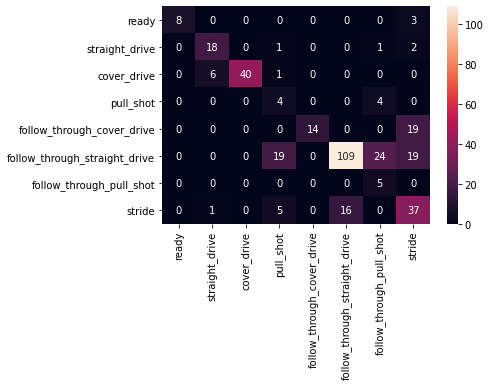

In [19]:
sns.heatmap(confusion_matrix(df['manual'], df['smote_200 class first highest']), annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g')

<AxesSubplot:>

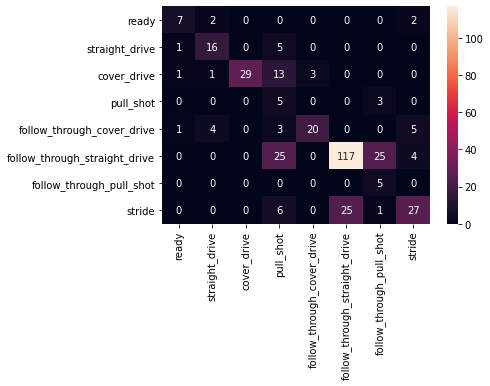

In [20]:
sns.heatmap(confusion_matrix(df['manual'], df['smote_500 class first highest']), annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g')

<AxesSubplot:>

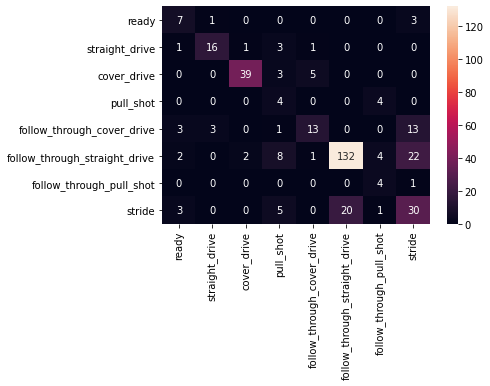

In [21]:
sns.heatmap(confusion_matrix(df['manual'], df['smote_200 balanced class first highest']), annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g')

<AxesSubplot:>

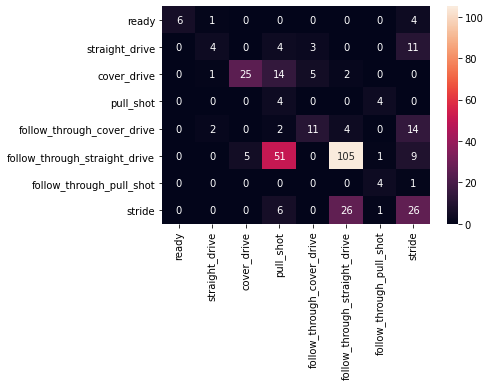

In [22]:
sns.heatmap(confusion_matrix(df['manual'], df['smote_500 balanced class first highest']), annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g')

## These heatmaps might not mean much, because there are many repeated frames in one of the straight drive videos which is skewing the result.